# California Housing Price Prediction

## Downloading Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
housing = pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Exploratory Data Analysis

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


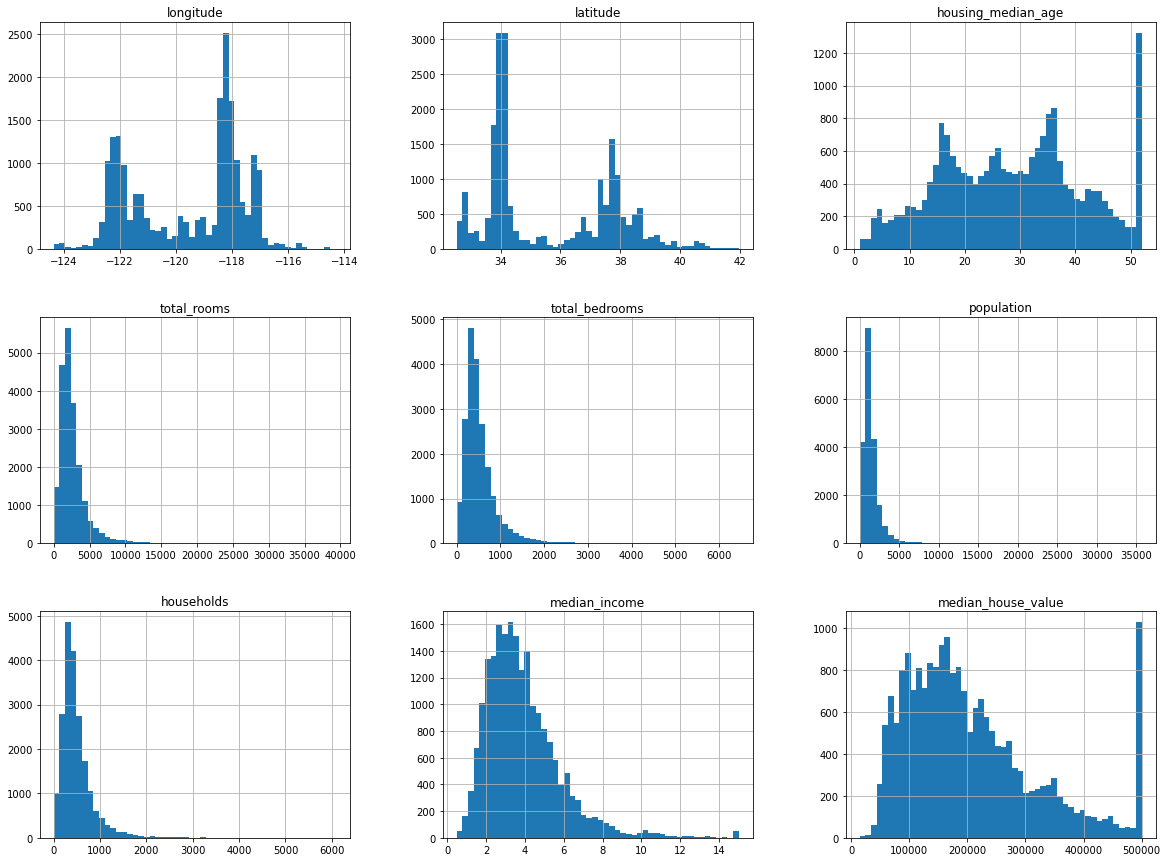

In [7]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:>

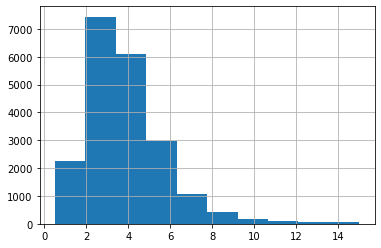

In [8]:
# median income looks like an important feature

housing['median_income'].hist()

In [9]:
# dividing the income category to limit the number income category
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
# putting everything greater than 5th category in 5th category
housing['income_cat'].where(housing['income_cat'] < 5, other=5.0, inplace=True)

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=29)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [11]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [12]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [13]:
for items in (strat_train_set, strat_test_set):
    items.drop("income_cat", axis=1, inplace=True)

In [14]:
housing = strat_train_set.copy()

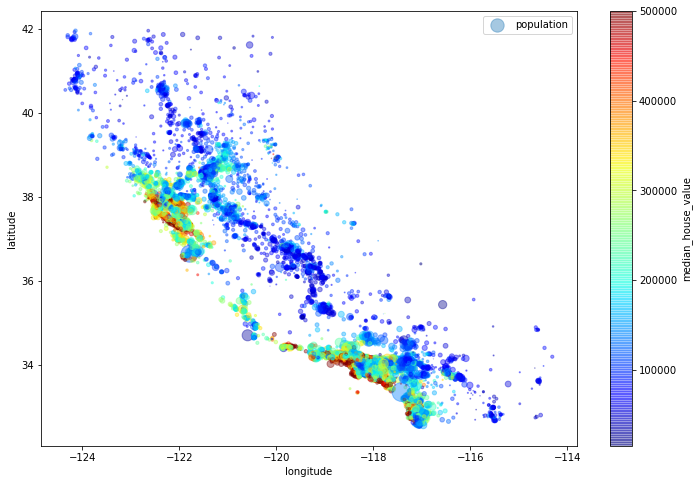

In [15]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s=housing['population']/100, label='population', figsize=(12,8),
            c='median_house_value', cmap=plt.get_cmap('jet'), sharex=False)
plt.legend()

In [16]:
corr_matrix = housing.corr()

corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691071
total_rooms           0.127306
housing_median_age    0.108483
households            0.060084
total_bedrooms        0.043921
population           -0.028341
longitude            -0.043780
latitude             -0.146422
Name: median_house_value, dtype: float64

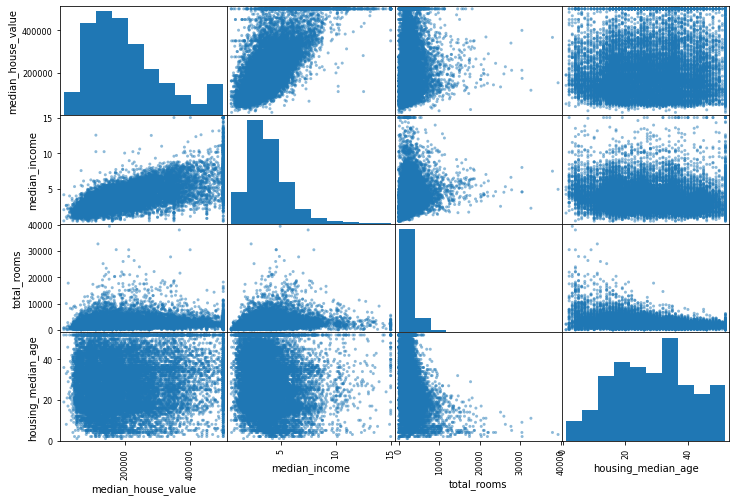

In [17]:
imp_attributes = ['median_house_value','median_income', 'total_rooms', 'housing_median_age']

from pandas.plotting import scatter_matrix

scatter_matrix(housing[imp_attributes], figsize=(12,8))
plt.show()

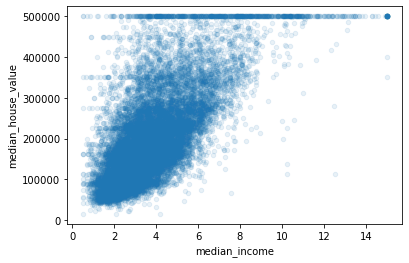

In [18]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)
plt.show()

In [19]:
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']
housing['rooms_per_household'] = housing['total_rooms']/housing['households']

In [20]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.691071
rooms_per_household         0.151804
total_rooms                 0.127306
housing_median_age          0.108483
households                  0.060084
total_bedrooms              0.043921
population_per_household   -0.021688
population                 -0.028341
longitude                  -0.043780
latitude                   -0.146422
bedrooms_per_room          -0.253572
Name: median_house_value, dtype: float64

In [21]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [22]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()

median= housing['total_bedrooms'].median()
sample_incomplete_rows['total_bedrooms'].fillna(median, inplace=True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5654,-118.30,33.73,42.0,1731.0,433.0,866.0,403.0,2.7451,NEAR OCEAN
14930,-117.02,32.66,19.0,771.0,433.0,376.0,108.0,6.6272,NEAR OCEAN
9814,-121.93,36.62,34.0,2351.0,433.0,1063.0,428.0,3.7250,NEAR OCEAN
14986,-117.03,32.73,34.0,2061.0,433.0,1169.0,400.0,3.5096,NEAR OCEAN
4767,-118.37,34.03,37.0,1236.0,433.0,966.0,292.0,3.0694,<1H OCEAN


## Preprocessing Dataset

In [23]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [24]:
housing_num = housing.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [25]:
imputer.statistics_

array([-118.5    ,   34.26   ,   29.     , 2123.     ,  433.     ,
       1159.     ,  407.     ,    3.53275])

In [26]:
 X = imputer.transform(housing_num)

In [27]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [28]:
housing_tr[housing_tr.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income


In [29]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-118.09,33.92,35.0,1994.0,419.0,1491.0,428.0,3.7383
1,-122.57,37.96,52.0,3458.0,468.0,1449.0,471.0,9.1834
2,-121.96,36.97,23.0,4324.0,1034.0,1844.0,875.0,3.0777
3,-118.28,34.02,52.0,281.0,103.0,470.0,96.0,1.9375
4,-116.50,33.81,26.0,5032.0,1229.0,3086.0,1183.0,2.5399


In [30]:
housing_cat = housing["ocean_proximity"]
housing_cat.head()

7771      <1H OCEAN
9352       NEAR BAY
18657    NEAR OCEAN
4873      <1H OCEAN
12350        INLAND
Name: ocean_proximity, dtype: object

In [31]:
housing_cat_encoded, housing_categories = housing_cat.factorize()

In [32]:
housing_cat_encoded[:10]

array([0, 1, 2, 0, 3, 2, 0, 2, 0, 2])

In [33]:
housing_categories

Index(['<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'INLAND', 'ISLAND'], dtype='object')

In [34]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(1,-1))

In [35]:
housing_cat_1hot

<1x16512 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [36]:
housing_cat_1hot.toarray()

array([[1., 1., 1., ..., 1., 1., 1.]])

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        

In [38]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [39]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, 
                                     columns=list(housing)+['rooms_per_household', 
                                                            'population_per_household']
                                    )
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-118.09,33.92,35,1994,419,1491,428,3.7383,<1H OCEAN,4.65888,3.48364
1,-122.57,37.96,52,3458,468,1449,471,9.1834,NEAR BAY,7.34183,3.07643
2,-121.96,36.97,23,4324,1034,1844,875,3.0777,NEAR OCEAN,4.94171,2.10743
3,-118.28,34.02,52,281,103,470,96,1.9375,<1H OCEAN,2.92708,4.89583
4,-116.5,33.81,26,5032,1229,3086,1183,2.5399,INLAND,4.25359,2.60862


## Creating Pipelines

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [43]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.attribute_names].values

In [44]:
num_attribs = list(housing_num.columns)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("selector", DataFrameSelector(cat_attribs)),
    ("cat_encoder", OneHotEncoder(sparse=False))
])

In [45]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

In [46]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[ 0.74049299, -0.80402818,  0.50616062, ...,  0.        ,
         0.        ,  0.        ],
       [-1.49391785,  1.081436  ,  1.86235125, ...,  0.        ,
         1.        ,  0.        ],
       [-1.18967887,  0.61940394, -0.45115041, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.18967887,  0.79208259,  0.58593654, ...,  0.        ,
         0.        ,  0.        ],
       [-0.09741107,  0.51673015,  1.22414389, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.17690276, -0.64535051, -1.00958184, ...,  0.        ,
         0.        ,  1.        ]])

## Training Various Models

In [47]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [48]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

In [49]:
print("Prediction: ", lin_reg.predict(some_data_prepared))
print("Actual Labels: ", list(some_labels))

Prediction:  [209526.30110297 455497.76141409 252936.22210586 173615.33127943
 114294.56522481]
Actual Labels:  [166200.0, 500001.0, 263800.0, 38800.0, 94800.0]


In [50]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67949.91466225038

In [51]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [52]:
housing_predictions = tree_reg.predict(housing_prepared)

tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [53]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, cv=10, scoring='neg_mean_squared_error')

tree_rmse_scores = np.sqrt(-scores)

In [54]:
def display_scores(scores):
    print("scores: ", scores)
    print("mean: ", scores.mean())
    print("std deviation: ", scores.std())

In [55]:
display_scores(tree_rmse_scores)

scores:  [70108.95879317 69304.36707774 68920.74811563 71986.33522523
 68956.22483567 69512.39110795 69621.50028573 70933.31473283
 67339.0868612  69830.46435789]
mean:  69651.33913930184
std deviation:  1176.4868888309343


In [56]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, cv=10, scoring="neg_mean_squared_error")

lin_rmse = np.sqrt(-lin_scores)

display_scores(lin_rmse)

scores:  [67641.22210761 69245.155892   65690.83401976 67581.651926
 66586.04760743 66937.30771561 67397.33645629 69807.64170261
 66660.63451034 74883.89423608]
mean:  68243.17261737354
std deviation:  2500.726216291986


In [57]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=29)
forest_reg.fit(housing_prepared, housing_labels)


RandomForestRegressor(random_state=29)

In [58]:
housing_pred = forest_reg.predict(housing_prepared)

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, cv=10, scoring="neg_mean_squared_error")

forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

scores:  [48798.95593489 49442.05419015 47702.60343307 49006.05515985
 48866.29133602 49510.51518099 48803.37540831 49289.34574597
 48197.06938977 53088.34920448]
mean:  49270.46149834922
std deviation:  1376.509849194807


## Hypyerparameter Tuning For Best Performing Model

In [59]:
#Hyperparameter tuning using GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2,3,4]}
]

rf_reg = RandomForestRegressor()

grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring="neg_mean_squared_error")

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [60]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [61]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [62]:
cv_res = grid_search.cv_results_

for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
    print(np.sqrt(-mean_score), params)

63861.3657940091 {'max_features': 2, 'n_estimators': 3}
54981.63758193878 {'max_features': 2, 'n_estimators': 10}
52036.730240610166 {'max_features': 2, 'n_estimators': 30}
59521.568795618536 {'max_features': 4, 'n_estimators': 3}
52011.359437940744 {'max_features': 4, 'n_estimators': 10}
50149.54220077807 {'max_features': 4, 'n_estimators': 30}
57500.70408786851 {'max_features': 6, 'n_estimators': 3}
51514.34750885027 {'max_features': 6, 'n_estimators': 10}
49130.28629397542 {'max_features': 6, 'n_estimators': 30}
57939.49660159046 {'max_features': 8, 'n_estimators': 3}
51360.38545701846 {'max_features': 8, 'n_estimators': 10}
49281.40244983172 {'max_features': 8, 'n_estimators': 30}
61451.28565024927 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53731.53898175435 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58914.93742356604 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51561.166476518585 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [63]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.049494,0.010469,0.002144,0.000336,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.127049e+09,-3.885708e+09,-4.048729e+09,-4.132712e+09,-4.197172e+09,-4.078274e+09,1.071762e+08,18
1,0.142765,0.001960,0.005817,0.000043,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.069653e+09,-2.952295e+09,-2.998654e+09,-2.983450e+09,-3.110850e+09,-3.022980e+09,5.839539e+07,11
2,0.421731,0.002094,0.018631,0.000084,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.798385e+09,-2.628822e+09,-2.691007e+09,-2.610010e+09,-2.810883e+09,-2.707821e+09,8.356354e+07,9
3,0.071463,0.001334,0.001898,0.000015,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.530925e+09,-3.443171e+09,-3.336175e+09,-3.746258e+09,-3.657557e+09,-3.542817e+09,1.465092e+08,16
4,0.236403,0.002523,0.006116,0.000217,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.755271e+09,-2.624445e+09,-2.629124e+09,-2.634754e+09,-2.882313e+09,-2.705182e+09,1.011411e+08,8
5,0.702216,0.006620,0.018839,0.000089,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.479842e+09,-2.380985e+09,-2.522143e+09,-2.527311e+09,-2.664602e+09,-2.514977e+09,9.141045e+07,3
6,0.099122,0.001494,0.002100,0.000230,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.376385e+09,-3.255989e+09,-3.252709e+09,-3.362827e+09,-3.283744e+09,-3.306331e+09,5.295123e+07,12
7,0.327934,0.002188,0.005936,0.000092,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.664507e+09,-2.590192e+09,-2.690181e+09,-2.570031e+09,-2.753729e+09,-2.653728e+09,6.706286e+07,6
8,0.978807,0.004714,0.018818,0.000301,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.450662e+09,-2.269633e+09,-2.404349e+09,-2.405765e+09,-2.538516e+09,-2.413785e+09,8.700692e+07,1
9,0.127300,0.001870,0.001995,0.000055,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.356205e+09,-3.119615e+09,-3.409337e+09,-3.472653e+09,-3.427115e+09,-3.356985e+09,1.244051e+08,14


In [64]:
#Hyperparameter tuning using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

params_distrib = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8)
}

rf_reg = RandomForestRegressor(random_state=29)

rnd_search = RandomizedSearchCV(rf_reg, param_distributions=params_distrib, n_iter=10,
                               cv=5, scoring='neg_mean_squared_error', random_state=29)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=29),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8d228f23d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8d00796400>},
                   random_state=29, scoring='neg_mean_squared_error')

In [65]:
rnd_search.best_params_

{'max_features': 6, 'n_estimators': 149}

In [66]:
cv_res = rnd_search.cv_results_

for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
    print(np.sqrt(-mean_score), params)

48554.90771026735 {'max_features': 6, 'n_estimators': 116}
49443.4111089091 {'max_features': 5, 'n_estimators': 35}
53570.270118359476 {'max_features': 1, 'n_estimators': 97}
50902.04894946984 {'max_features': 2, 'n_estimators': 114}
53580.197475159825 {'max_features': 1, 'n_estimators': 98}
48632.86288202718 {'max_features': 7, 'n_estimators': 95}
53454.92589163202 {'max_features': 1, 'n_estimators': 156}
48524.07648848737 {'max_features': 6, 'n_estimators': 149}
48560.33445659694 {'max_features': 7, 'n_estimators': 152}
53446.59972905179 {'max_features': 1, 'n_estimators': 165}


In [67]:
pd.DataFrame(rnd_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.802202,0.009126,0.070244,0.000387,6,116,"{'max_features': 6, 'n_estimators': 116}",-2.345560e+09,-2.241925e+09,-2.357194e+09,-2.329061e+09,-2.514156e+09,-2.357579e+09,8.814764e+07,2
1,0.981324,0.001675,0.021911,0.000132,5,35,"{'max_features': 5, 'n_estimators': 35}",-2.500420e+09,-2.334777e+09,-2.429211e+09,-2.390803e+09,-2.568044e+09,-2.444651e+09,8.191023e+07,5
2,0.984815,0.002961,0.058785,0.000120,1,97,"{'max_features': 1, 'n_estimators': 97}",-2.864489e+09,-2.818804e+09,-2.825577e+09,-2.832746e+09,-3.007254e+09,-2.869774e+09,7.049983e+07,9
3,1.598710,0.002619,0.068978,0.000138,2,114,"{'max_features': 2, 'n_estimators': 114}",-2.602517e+09,-2.518801e+09,-2.551076e+09,-2.594978e+09,-2.687721e+09,-2.591019e+09,5.711393e+07,6
4,0.995141,0.002203,0.059342,0.000067,1,98,"{'max_features': 1, 'n_estimators': 98}",-2.865412e+09,-2.819868e+09,-2.830297e+09,-2.833021e+09,-3.005589e+09,-2.870838e+09,6.907809e+07,10
5,3.568461,0.011807,0.057669,0.000141,7,95,"{'max_features': 7, 'n_estimators': 95}",-2.369444e+09,-2.265294e+09,-2.325914e+09,-2.388723e+09,-2.476401e+09,-2.365155e+09,6.994495e+07,4
6,1.599131,0.008702,0.095048,0.000918,1,156,"{'max_features': 1, 'n_estimators': 156}",-2.863177e+09,-2.799923e+09,-2.808834e+09,-2.821896e+09,-2.993315e+09,-2.857429e+09,7.131472e+07,8
7,4.894288,0.010133,0.089753,0.000495,6,149,"{'max_features': 6, 'n_estimators': 149}",-2.351352e+09,-2.245663e+09,-2.341533e+09,-2.326498e+09,-2.507883e+09,-2.354586e+09,8.524547e+07,1
8,5.717611,0.024170,0.092770,0.000431,7,152,"{'max_features': 7, 'n_estimators': 152}",-2.367270e+09,-2.249417e+09,-2.324388e+09,-2.367661e+09,-2.481794e+09,-2.358106e+09,7.539807e+07,3
9,1.690115,0.010422,0.101347,0.002451,1,165,"{'max_features': 1, 'n_estimators': 165}",-2.869698e+09,-2.796720e+09,-2.807505e+09,-2.817913e+09,-2.990859e+09,-2.856539e+09,7.167957e+07,7
